# Tu primer random forest con scikit-learn

In [88]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [89]:
#Cargamos dataset a utilizar
df = pd.read_csv('/home/roy/Ramdom_forest_y_arboles_de_decision/data/pima-indians-diabetes.csv',sep=',')


## Exploración de datos

In [90]:
#Visualizacion del dataframe aleatoria
df.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
180,0,119,64,18,92,34.9,0.725,23,0
710,5,126,78,27,22,29.6,0.439,40,0
110,8,155,62,26,495,34.0,0.543,46,1
207,1,96,64,27,87,33.2,0.289,21,0
426,1,181,64,30,180,34.1,0.328,38,1
304,2,120,76,37,105,39.7,0.215,29,0
756,0,123,72,0,0,36.3,0.258,52,1
527,0,117,66,31,188,30.8,0.493,22,0
387,5,144,82,26,285,32.0,0.452,58,1
33,10,122,78,31,0,27.6,0.512,45,0


In [91]:
#Renombramos las columnas
df.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [92]:
#Verificacion de datos
df.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [93]:
#Analizamos el shape del objeto
df.shape

(767, 9)

In [94]:
#Visualizamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   1. Number of times pregnant                                                  767 non-null    int64  
 1   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test  767 non-null    int64  
 2   3. Diastolic blood pressure (mm Hg)                                          767 non-null    int64  
 3   4. Triceps skin fold thickness (mm)                                          767 non-null    int64  
 4   5. 2-Hour serum insulin (mu U/ml)                                            767 non-null    int64  
 5   6. Body mass index (weight in kg/(height in m)^2)                            767 non-null    float64
 6   7. Diabetes pedigree function              

In [95]:
# datos faltantes 
df.isnull().sum().sum()

0

## Entrenamiento de random forest con scikit-learn

In [96]:
#Separamos en X e y
X = df.drop('9. Class variable (0 or 1)',axis=1)
y = df['9. Class variable (0 or 1)']

In [97]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split
#30% para test y 70% para train
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=00000)


In [98]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=15,random_state=00000)



### n_estimators 

es un hiperparámetro que determina la cantidad de árboles de decisión que se construirán en el bosque aleatorio (random forest). Cada árbol se entrena con una muestra aleatoria de los datos y vota para la clasificación final. Cuantos más árboles haya, más robusto será el modelo y menos propenso a sobreajustarse a los datos de entrenamiento.

Valores pequeños: Si tienes un conjunto de datos pequeño(por ejemplo, menos de 10,000 muestras)  o deseas un modelo más rápido, puedes usar un valor pequeño como 10 o 50.

Valores medianos: Para conjuntos de datos de tamaño mediano(por ejemplo, entre 10,000 y 100,000 muestras), valores como 100 o 200 suelen funcionar bien.

Valores grandes: Para conjuntos de datos grandes(más de 100,000 muestras) o cuando se busca obtener un rendimiento muy alto, valores más grandes, como 500 o 1000, pueden ser útiles.

In [99]:
#Entrenamiento
random_forest.fit(X_train,y_train) # valores de entrenamiento 

RandomForestClassifier(n_estimators=15, random_state=0)

In [100]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [101]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train,y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f'train_accuracy {train_accuracy}')
print(f'test_acurracy {test_accuracy}')

train_accuracy 0.996268656716418
test_acurracy 0.7489177489177489


In [102]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    
    {'feature': list(X.columns), # toma cada una de las columnas de X
     'importance': random_forest.feature_importances_ # creamos el atributo de importance que contiene el feature importance de nuestro modelo 
    }
).sort_values('importance',ascending= False) # se muestra de manera descendente los mas importantes 
# Mostrar
feature_importances_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.215249
5,6. Body mass index (weight in kg/(height in m)^2),0.192337
6,7. Diabetes pedigree function,0.148288
7,8. Age (years),0.118572
2,3. Diastolic blood pressure (mm Hg),0.085234
0,1. Number of times pregnant,0.084193
4,5. 2-Hour serum insulin (mu U/ml),0.082141
3,4. Triceps skin fold thickness (mm),0.073984


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '7. Diabetes pedigree function'),
  Text(3, 0, '8. Age (years)'),
  Text(4, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(5, 0, '1. Number of times pregnant'),
  Text(6, 0, '5. 2-Hour serum insulin (mu U/ml)'),
  Text(7, 0, '4. Triceps skin fold thickness (mm)')])

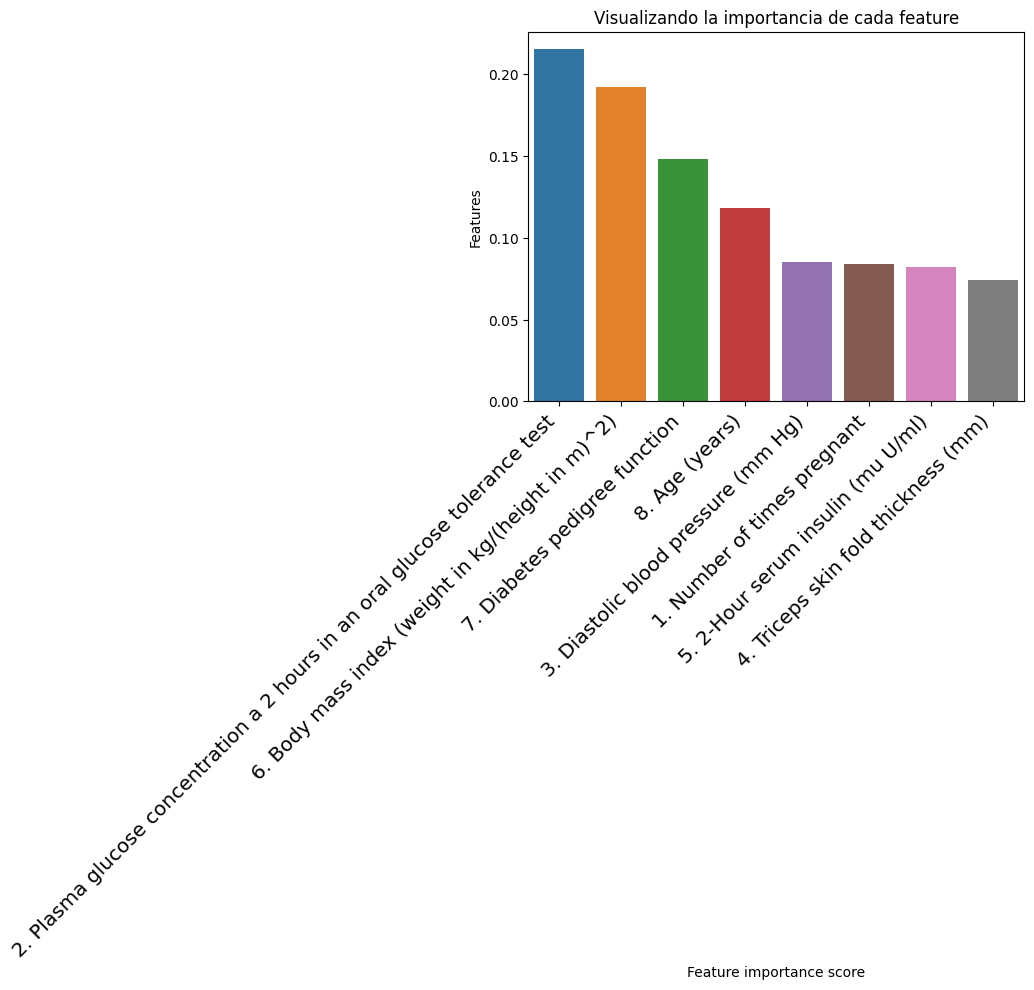

In [103]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada feature')
plt.xticks(rotation= 45, horizontalalignment = 'right',fontweight='light',fontsize='x-large')


## Que es un random forest 

un random forest son varios arboles de deciciones unidos para dar la mejor respuesta posible 

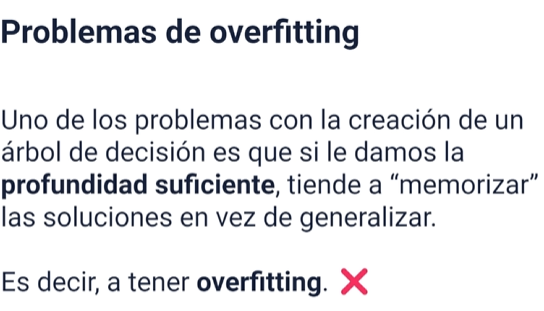

diagrama practico de un random forest

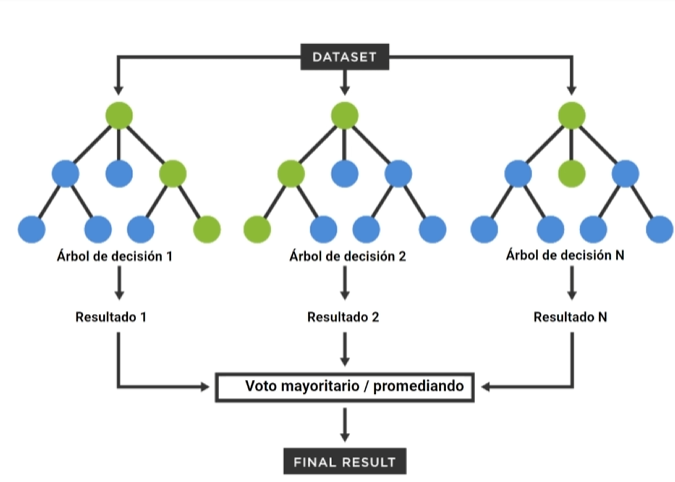

## ¿Cómo decide el algoritmo de random forest para entregar el resultado final?
Promediando los resultados de los N árboles de decisión.

## ¿Cuándo utilizar random forest?

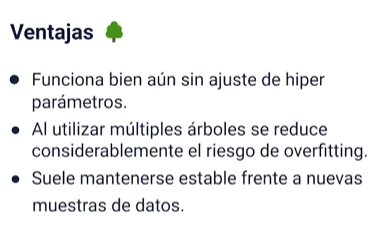

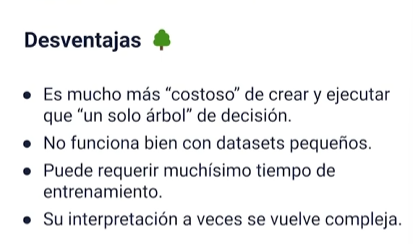

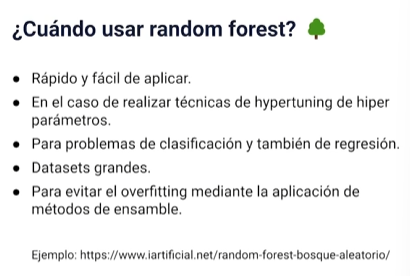

https://www.iartificial.net/random-forest-bosque-aleatorio/

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**